In [2]:
import dill
import scanner_interpretation as sc
from tqdm import tqdm
ds = sc.getDataStores()
pnt_alt = []
for d in ds:
    observations = d.get_observations(required_irf="all-optional")
    for obs in tqdm(observations):
        pnt_alt.append(obs.obs_info["ALT_PNT"])

with open("pkl_jugs/all_alt_pnt.pkl","wb") as f:
    dill.dump(pnt_alt,f)

100%|██████████| 6421/6421 [09:44<00:00, 10.99it/s]


In [1]:
import numpy as np
from scipy import stats
from gammapy.maps import RegionGeom
from regions import RectangleSkyRegion
from astropy.coordinates import SkyCoord
import astropy.units as u

In [8]:
FoV_SkyRegion = RectangleSkyRegion(SkyCoord(0,0,unit="deg"),5*u.deg,5*u.deg)
FoV_RegionGeom = RegionGeom(FoV_SkyRegion)
Omega = FoV_RegionGeom.solid_angle()
Trun_days = (28 / (60*24))
Omega_skies = Omega / (4*np.pi*u.sr)

In [44]:
Omega

<Quantity 0.00761544 sr>

In [36]:
Rmean = 820./2
Rvar = (60.**2 + 210.**2) /4

R = stats.norm.rvs(Rmean,np.sqrt(Rvar),int(1e4))
lamb = R*Trun_days*Omega_skies.value # counts

p = 1-np.exp(-lamb)
Pthresh = .999999426697
Ntries = np.log(1-Pthresh) / np.log( 1 - p)


113.78895241521512 29.76528478106763


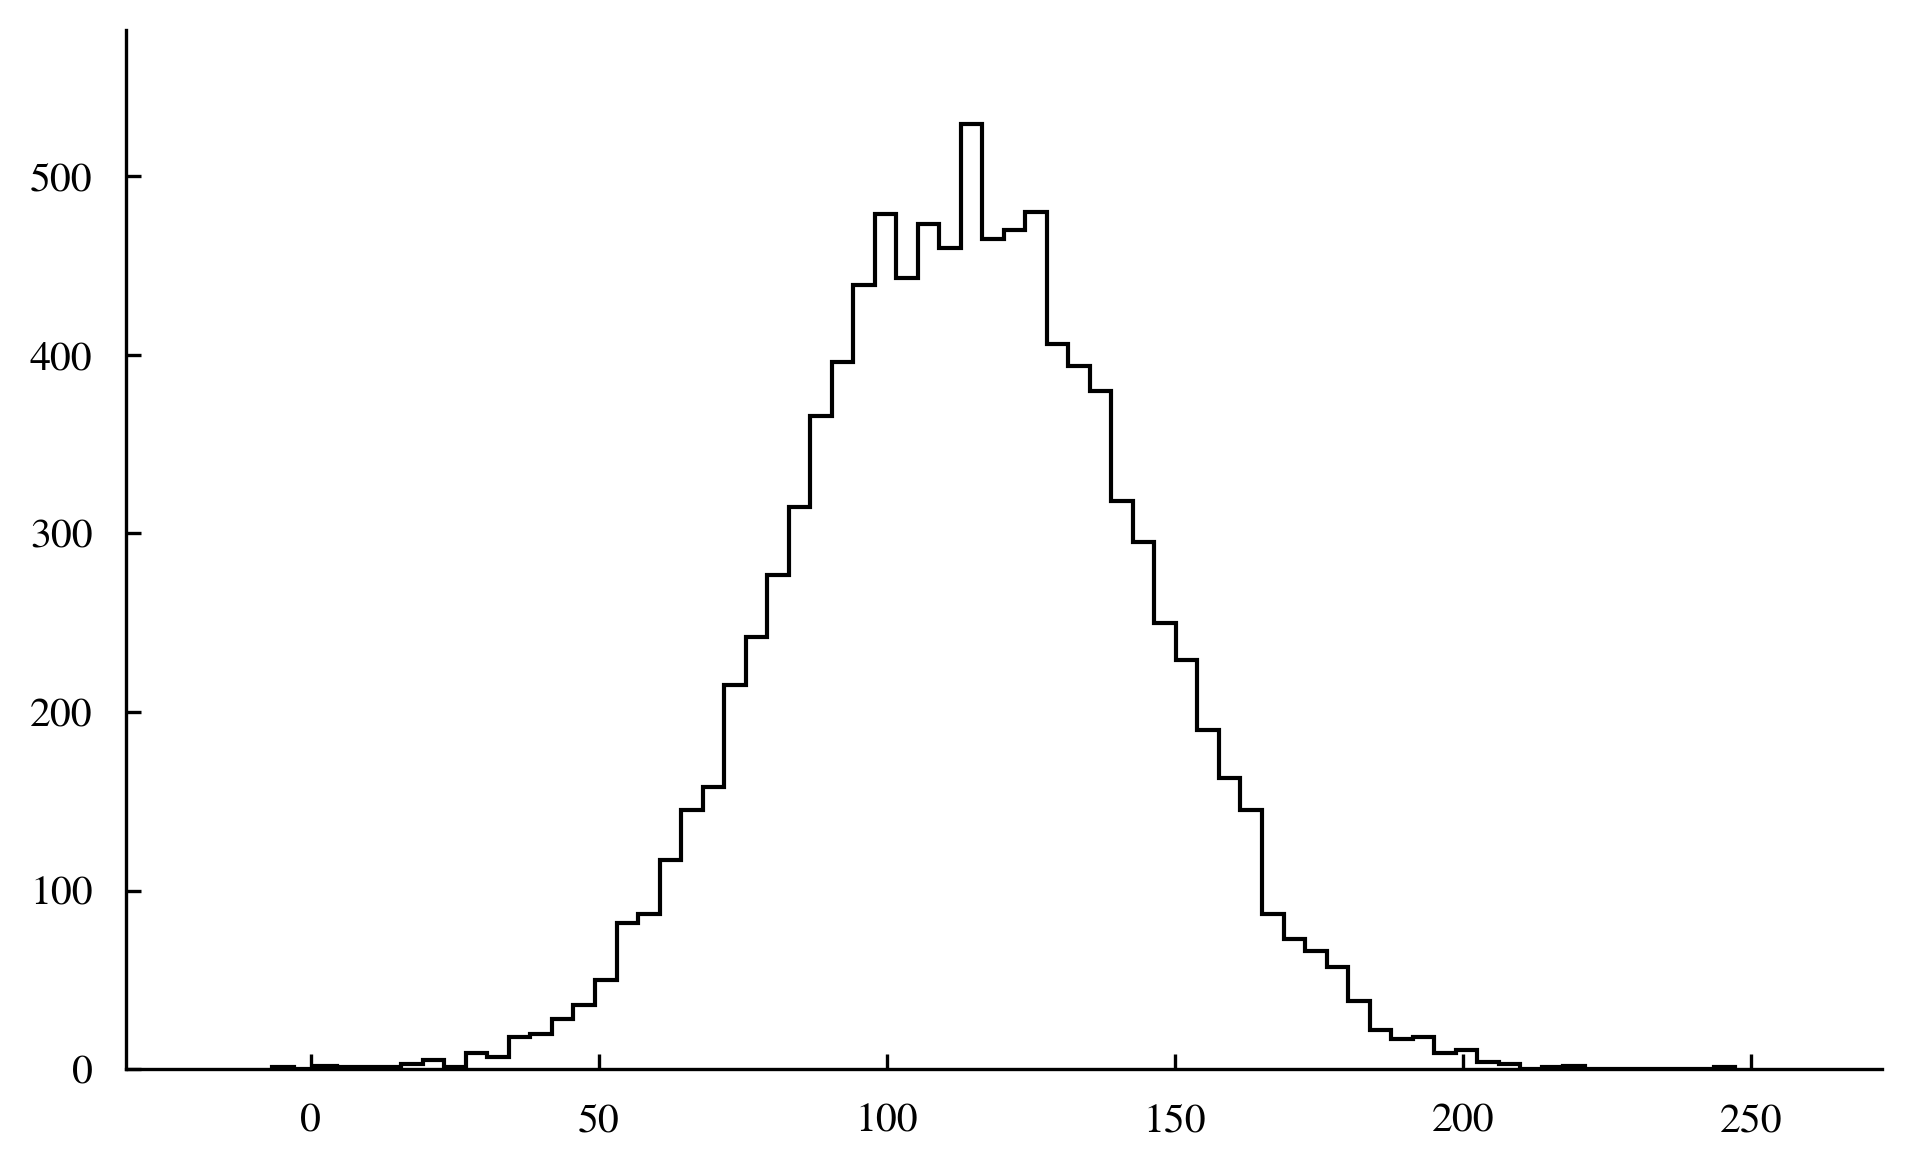

In [43]:
import matplotlib.pyplot as plt
# h = plt.hist(np.log10(Ntries),histtype="step")
h = plt.hist(lamb*23494,histtype="step")
print(np.mean(lamb)*23494,np.std(lamb)*23494)

In [2]:
from tevcat import TeVCat

In [3]:
tc = TeVCat()
len(tc)

Unknown observatory name found in GRB 160821B:  None
Unknown "discoverer" ID found in GRB 160821B: None
Unknown observatory name found in SNR G004.8+6.2:  None
Unknown "discoverer" ID found in SNR G004.8+6.2: None
Unknown observatory name found in 3HWC J0621+382:  None
Unknown "discoverer" ID found in 3HWC J0621+382: None
Unknown observatory name found in 3HWC J0630+186:  None
Unknown "discoverer" ID found in 3HWC J0630+186: None
Unknown observatory name found in 3HWC J0631+107:  None
Unknown "discoverer" ID found in 3HWC J0631+107: None


TypeError: object of type 'TeVCat' has no len()

In [4]:
len(tc.sources)

300